In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle datasets download -d gauthamp10/google-playstore-apps


Saving kaggle.json to kaggle.json
ref                                                          title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                   Jobs and Salaries in Data Science            76KB  2023-12-25 20:03:32           1504         28  1.0              
thedrcat/daigt-v2-train-dataset                              DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           3408        278  1.0              
willianoliveiragibin/road-accident-casualties                Road Accident Casualties                      7MB  2023-12-27 19:47:56            863         22  1.0              
marouandaghmoumi/dropout-and-success-student-data-analysis   Dropout and Success:

In [2]:
# Extract zip dataset File
import zipfile
zip_ref = zipfile.ZipFile('google-playstore-apps.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


**Importing the dependencies**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Data prepration and cleaning**

In [4]:
df = pd.read_csv('/content/Google-Playstore.csv')

In [5]:
df.head(5)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [6]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [7]:
#shape of dataset
df.shape

(2312944, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

**Observation:**
  

1.   The dataset having 2312944 rows and 24 columns
2.   The dataset in the columns are:
    ['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time']




**Discripitive Statistic**

---



In [9]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


**Observation**:
> we have 5 numerical column in our dataset





> **Rating**: maximum rating is 5.000000e+00

> **Rating Count**: maximum rating count is 1.385576e+08

> **Minimum Installs**: maximum value of minimum installs is 1.000000e+10

> **Maximum Installs**: maximum  value of maximum installs is 1.205763e+10

> **Price**: maximum price is 4.000000e+02













In [10]:
pd.set_option('display.max_columns',None)

In [11]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


**Missing values in the data**

In [12]:
df.isnull().sum().sort_values(ascending=False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  2
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

**Plot the missing values**

Text(0.5, 1.0, 'missing null values')

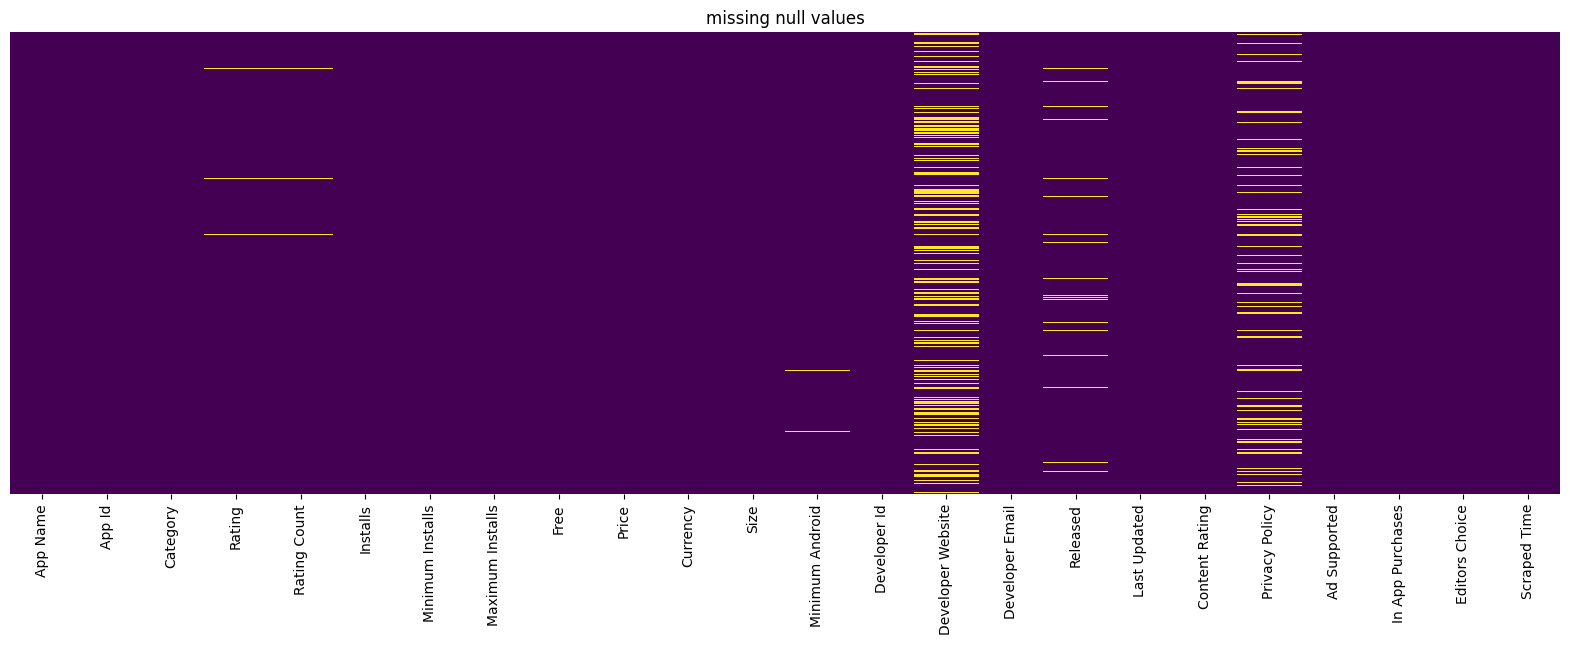

In [13]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('missing null values')

**Missing percentage in the data**

In [14]:
missing_percentage = df.isnull().sum().sort_values(ascending=False)/len(df)
missing_percentage

Developer Website    3.289466e-01
Privacy Policy       1.819988e-01
Released             3.071972e-02
Rating               9.893452e-03
Rating Count         9.893452e-03
Minimum Android      2.823242e-03
Size                 8.474049e-05
Currency             5.836717e-05
Installs             4.626139e-05
Minimum Installs     4.626139e-05
Developer Id         1.426753e-05
Developer Email      1.340283e-05
App Name             8.646988e-07
App Id               0.000000e+00
Price                0.000000e+00
Free                 0.000000e+00
Maximum Installs     0.000000e+00
Last Updated         0.000000e+00
Content Rating       0.000000e+00
Category             0.000000e+00
Ad Supported         0.000000e+00
In App Purchases     0.000000e+00
Editors Choice       0.000000e+00
Scraped Time         0.000000e+00
dtype: float64

**Plot the missing percentage of null values**

Text(0.5, 1.0, 'missing percentage of null values')

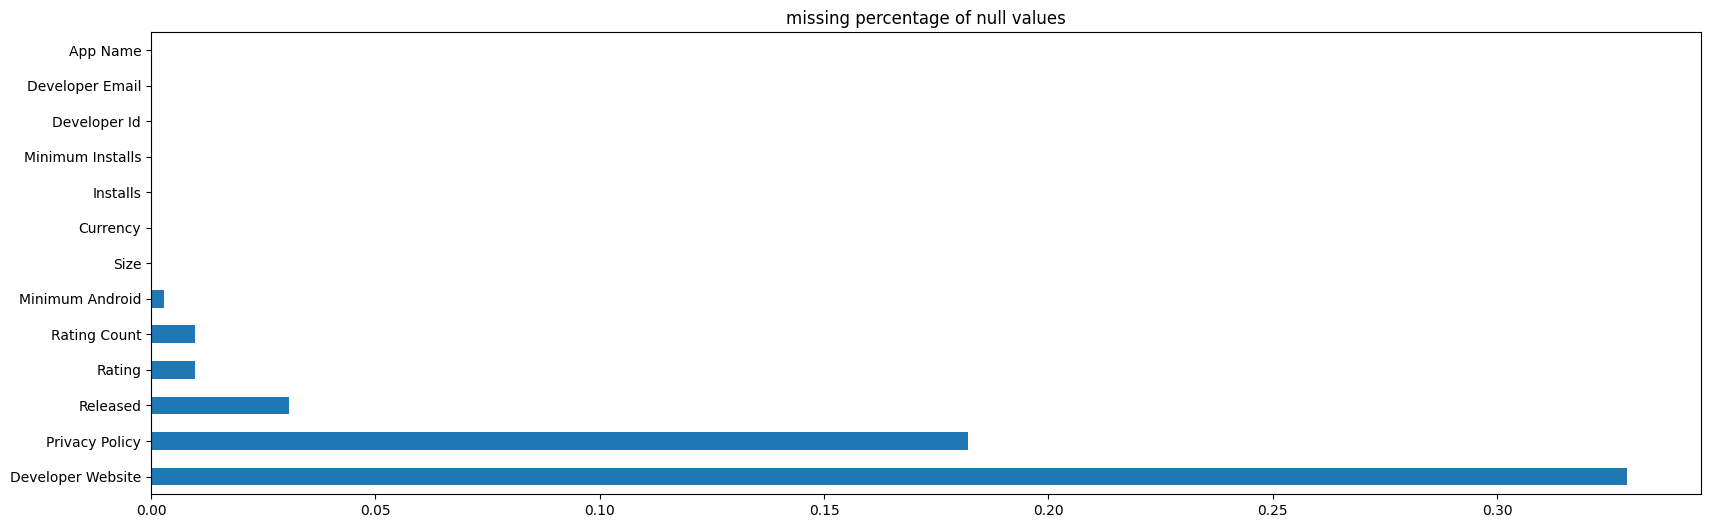

In [15]:
missing_percentage=missing_percentage[missing_percentage!=0]
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,6)
missing_percentage.plot(kind='barh')
plt.title('missing percentage of null values')

**Observation:**

> Dealing with Null values

      1.The columns having highest percentage of null values are:
        * Developer Website
        * Privacy Policy
> **Note:** These two columns are not helpfull,if we want we can drop these columns and add some feature on data set

      2. We can drop the small null values for the columns
          *   Size
          *   Currency
          *   Installs
          *   Minimum Installs
          *   Developer Id
          *   Developer Email
      3. Rating,Rating count,Released are important columns so its good to fill the null values.
          *   Rating
          *   Rating Count
          *   Minimum Android
          *   Released











**Drop the Null values of columns we selected**

In [16]:
df.dropna(subset=['App Name','Size','Currency','Installs','Minimum Installs','Developer Id','Developer Email'],inplace=True)

In [17]:
df.isnull().sum()

App Name                  0
App Id                    0
Category                  0
Rating                22572
Rating Count          22572
Installs                  0
Minimum Installs          0
Maximum Installs          0
Free                      0
Price                     0
Currency                  0
Size                      0
Minimum Android        6530
Developer Id              0
Developer Website    760716
Developer Email           0
Released              70748
Last Updated              0
Content Rating            0
Privacy Policy       420845
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

**Checking duplicate in the App Name**

In [18]:
boolean = df['App Name'].duplicated().any()

In [19]:
df['App Name'].value_counts()

Tic Tac Toe                     382
Calculator                      261
Flashlight                      256
BMI Calculator                  201
Age Calculator                  190
                               ... 
Foodiz Resto                      1
Astra OtoReward                   1
MedTerm Dictionary                1
Urban garden and sowing.          1
Biliyor Musun - Sonsuz Yarış      1
Name: App Name, Length: 2177593, dtype: int64

In [20]:
boolean = df['App Id'].duplicated().any()
boolean

False

In [21]:
df['App Id'].value_counts()

com.ishakwe.gakondo                    1
com.avai.amp.dewtour                   1
com.myhomebuy                          1
com.apocalipseescatologia.app          1
com.puzzlegame.wordconnect             1
                                      ..
id.compro.virtualcompetition           1
com.fitivity.basketball_point_guard    1
smartgr.gardenshower.ideas             1
com.euroland.mobiletools.ae_nbad       1
com.yyazilim.biliyormusun              1
Name: App Id, Length: 2312548, dtype: int64

> we have the app with same name but with unique App IDs so the Apps are differed based on the Apps IDs



**Lets Explore the Numerical columns**

In [22]:
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

its in the object type,we need to change it into int type

In [23]:
df['Installs']=df['Installs'].str.split('+').str[0] #remove + symbol
df['Installs'].replace(',','',regex=True,inplace=True)#replace the comas ',' in the install column
df['Installs']=df['Installs'].astype(int)             #converting it into the  int type

In [24]:
df['Installs'].unique()

array([         10,        5000,          50,         100,        1000,
               500,       50000,       10000,           1,      500000,
            100000,           5,    10000000,     1000000,     5000000,
                 0,   100000000,    50000000,  1000000000,   500000000,
        5000000000, 10000000000])

In [25]:
df['Currency'].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [26]:
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)


> 1. The size of app is GB,MB and KB,lets convert the data into the size in MB





In [27]:
df['Size']=df['Size'].apply(lambda x: str(x).replace('M','')if 'M' in str(x) else x)

In [28]:
df['Size']=df['Size'].apply(lambda x: str(x).replace(',','.') if ',' in str(x) else x)

convert (,) replace to (.) dot



In [29]:
df['Size']=df['Size'].apply(lambda x: str(x).replace('Varies with device','0') if 'Varies with device' in str(x) else x)

**Conversion of KBs to MBs**

In [30]:
df['Size']=df['Size'].apply(lambda x: float(str(x).replace('k','')) / 1000 if 'k' in str(x) else x)

**Conversion of GBs to MBs**

In [31]:
df['Size']=df['Size'].apply(lambda x: float(str(x).replace('G','')) * 1000 if 'G' in str(x) else x)

In [32]:
df['Size'] = df['Size'].astype(float)

In [33]:
df['Size'].dtypes

dtype('float64')

In [34]:
df['Minimum Android']

0            7.1 and up
1            5.0 and up
2          4.0.3 and up
3          4.0.3 and up
4            4.1 and up
               ...     
2312939      4.1 and up
2312940      4.1 and up
2312941      5.0 and up
2312942      5.0 and up
2312943      5.0 and up
Name: Minimum Android, Length: 2312548, dtype: object

In [35]:
df['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3          Everyone
4          Everyone
             ...   
2312939        Teen
2312940    Everyone
2312941    Everyone
2312942    Everyone
2312943    Everyone
Name: Content Rating, Length: 2312548, dtype: object

In [36]:
df['Released']

0          Feb 26, 2020
1          May 21, 2020
2           Aug 9, 2019
3          Sep 10, 2018
4          Feb 21, 2020
               ...     
2312939             NaN
2312940    Jan 17, 2018
2312941    Aug 19, 2018
2312942     Aug 1, 2016
2312943     Aug 9, 2019
Name: Released, Length: 2312548, dtype: object

In [37]:
df['Privacy Policy']

0                         https://beniyizibyose.tk/projects/
1          https://dev4phones.wordpress.com/licencia-de-uso/
2          https://www.vietnamairlines.com/vn/en/terms-an...
3                                                        NaN
4                                http://www.horodyski.com.pl
                                 ...                        
2312939               http://a.4399sy.com.hk/user/aggreement
2312940      http://www.oru.edu/about-oru/privacy-policy.php
2312941    https://appoworld.000webhostapp.com/datastruct...
2312942    https://docs.google.com/document/d/1x-9reZuLRX...
2312943    https://biliyor-musun-sons.flycricket.io/priva...
Name: Privacy Policy, Length: 2312548, dtype: object

In [38]:
df['Last Updated']

0          Feb 26, 2020
1          May 06, 2021
2          Aug 19, 2019
3          Oct 13, 2018
4          Nov 12, 2018
               ...     
2312939    Jun 01, 2021
2312940    Feb 02, 2018
2312941    Aug 19, 2018
2312942    May 05, 2021
2312943    Aug 19, 2019
Name: Last Updated, Length: 2312548, dtype: object

In [39]:
df['Scraped Time']

0          2021-06-15 20:19:35
1          2021-06-15 20:19:35
2          2021-06-15 20:19:35
3          2021-06-15 20:19:35
4          2021-06-15 20:19:35
                  ...         
2312939    2021-06-16 12:59:18
2312940    2021-06-16 12:59:19
2312941    2021-06-16 12:59:19
2312942    2021-06-16 12:59:19
2312943    2021-06-16 12:59:19
Name: Scraped Time, Length: 2312548, dtype: object

In [40]:
df['Free']

0          True
1          True
2          True
3          True
4          True
           ... 
2312939    True
2312940    True
2312941    True
2312942    True
2312943    True
Name: Free, Length: 2312548, dtype: bool

Creating the column type for free and paid Apps by using the Free column,it's helpfull while dealing with the paid and Free Apps

In [41]:
df['Type']=np.where(df['Free']==True,'Free','Paid')

In [42]:
df.drop(['Free'],axis=1,inplace=True)

In [43]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [44]:
df['Content Rating'].value_counts()

Everyone           2021788
Teen                196311
Mature 17+           60278
Everyone 10+         33881
Unrated                154
Adults only 18+        136
Name: Content Rating, dtype: int64

# Observation:

  1. we have varies Categories in the content Rating column:
      *   Everyone
      *   Teen
      *   Mature 17+
      *   Everyone 10+
      *   Adults only 18+
      *   Unrated

Now we make this categories to a simple 3 categories for better understanding:

              * Mature 17+ ----> to Adults
              * Everyone 10+ -------> to Teen
              * Unrated---------> to Everyone
              * Adults only 18+ --------> to Adults



















In [45]:
df['Content Rating']=df['Content Rating'].replace('Unrated','Everyone')
df['Content Rating']=df['Content Rating'].replace('Everyone 10+','Teen')
df['Content Rating']=df['Content Rating'].replace('Mature 17+','Adults')
df['Content Rating']=df['Content Rating'].replace('Adults only 18+','Adults')

In [46]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312548 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           int64  
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Price              float64
 9   Currency           object 
 10  Size               float64
 11  Minimum Android    object 
 12  Developer Id       object 
 13  Developer Website  object 
 14  Developer Email    object 
 15  Released           object 
 16  Last Updated       object 
 17  Content Rating     object 
 18  Privacy Policy     object 
 19  Ad Supported       bool   
 20  In App Purchases   bool   
 21  Editors Choice     bool   
 22  Scraped Time       object 
 23  Type               object 
dtypes: bool(3), float64(5), int64(2), object(14)
memor

In [48]:
df['Rating'].unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, nan, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9,
       1.7, 1.6, 1. , 1.1])

In [49]:
df['Rating Count'].unique()

array([0.0000e+00, 6.4000e+01, 5.0000e+00, ..., 8.7553e+04, 7.5960e+04,
       7.8351e+04])

MAXIMUM RATING

In [50]:
df['Rating Count'].max()

138557570.0

In [51]:
df['Rating Type'] = 'NoRatingProvided'
df.loc[(df['Rating Count'] > 0)&(df['Rating Count']<=10000.0),'Rating Type'] = 'Less than 10K'
df.loc[(df['Rating Count'] > 10000)&(df['Rating Count']<=500000.0),'Rating Type'] = 'Between 10K and 500K'
df.loc[(df['Rating Count'] > 500000)&(df['Rating Count']<=138557570.0),'Rating Type'] = 'More than 500K'


In [52]:
df['Rating Type'].value_counts()

Less than 10K           1192801
NoRatingProvided        1082303
Between 10K and 500K      35779
More than 500K             1665
Name: Rating Type, dtype: int64

In [53]:
df['Rating Type']

0              NoRatingProvided
1                 Less than 10K
2              NoRatingProvided
3                 Less than 10K
4              NoRatingProvided
                   ...         
2312939    Between 10K and 500K
2312940        NoRatingProvided
2312941        NoRatingProvided
2312942           Less than 10K
2312943           Less than 10K
Name: Rating Type, Length: 2312548, dtype: object

**T0P 10 Categories installed from the Google Play Store**

In [54]:
df['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [55]:
top_category = df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [56]:
top_category

,Category,Count
0,Education,241068
1,Music & Audio,154897
2,Tools,143971
3,Business,143749
4,Entertainment,138261
5,Lifestyle,118321
6,Books & Reference,116716
7,Personalization,89207
8,Health & Fitness,83497
9,Productivity,79681


In [57]:
Category_install = df.groupby(['Category'])[['Installs']].sum()

In [58]:
Category_install

,Installs
Category,
Action,17399855328
Adventure,5390108856
Arcade,14501230855
Art & Design,1116398902
Auto & Vehicles,1594745418
Beauty,404328787
Board,3290826164
Books & Reference,4819175179
Business,5236661902


In [59]:
top_category_installs  = pd.merge(top_category,Category_install,on='Category')
top_category_installs.head(5)

,Category,Count,Installs
0,Education,241068,5983815847
1,Music & Audio,154897,14239401798
2,Tools,143971,71440271217
3,Business,143749,5236661902
4,Entertainment,138261,17108397933


In [60]:
top_10_categories_installs = top_category_installs.head(10).sort_values(by=['Installs'],ascending=False)

<Axes: title={'center': 'Top 10 Installed Categories'}, xlabel='Category', ylabel='Installs'>

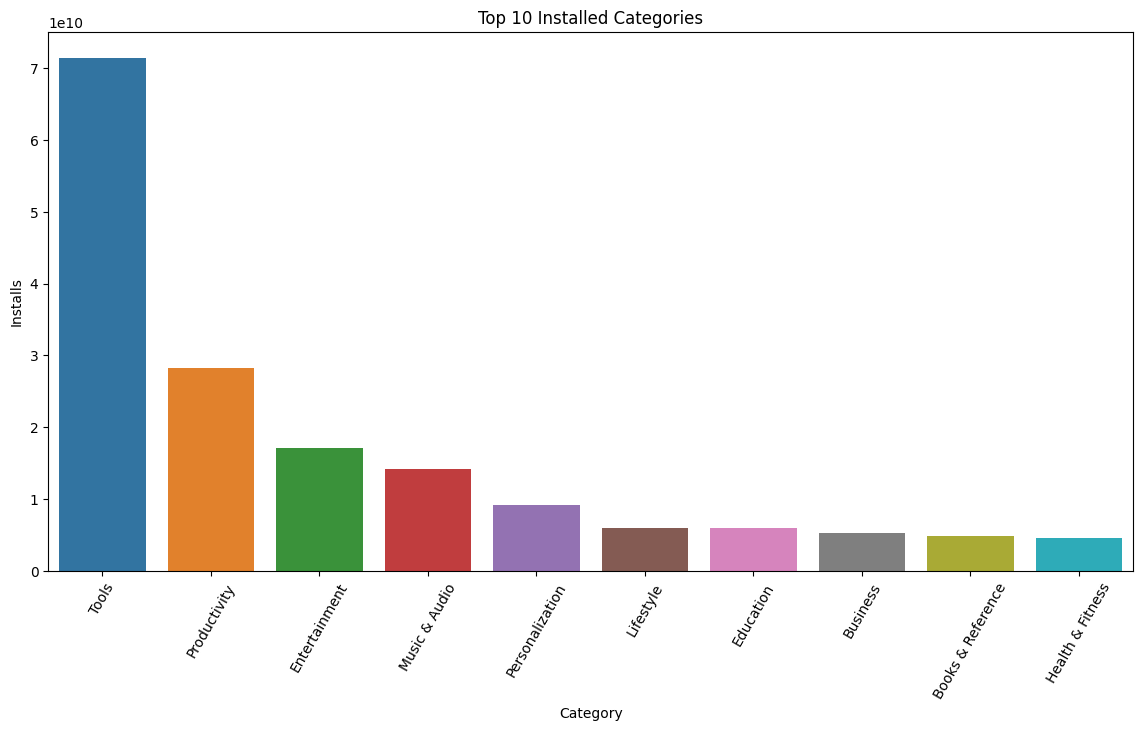

In [61]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel('Category')
plt.ylabel('Number of applications')
plt.title('Top 10 Installed Categories')
sns.barplot(x=top_10_categories_installs.Category,y=top_10_categories_installs.Installs)

**What are the 10 Categories as per Count**

<Axes: title={'center': 'Top 10 Installed Categories'}, xlabel='Category', ylabel='Count'>

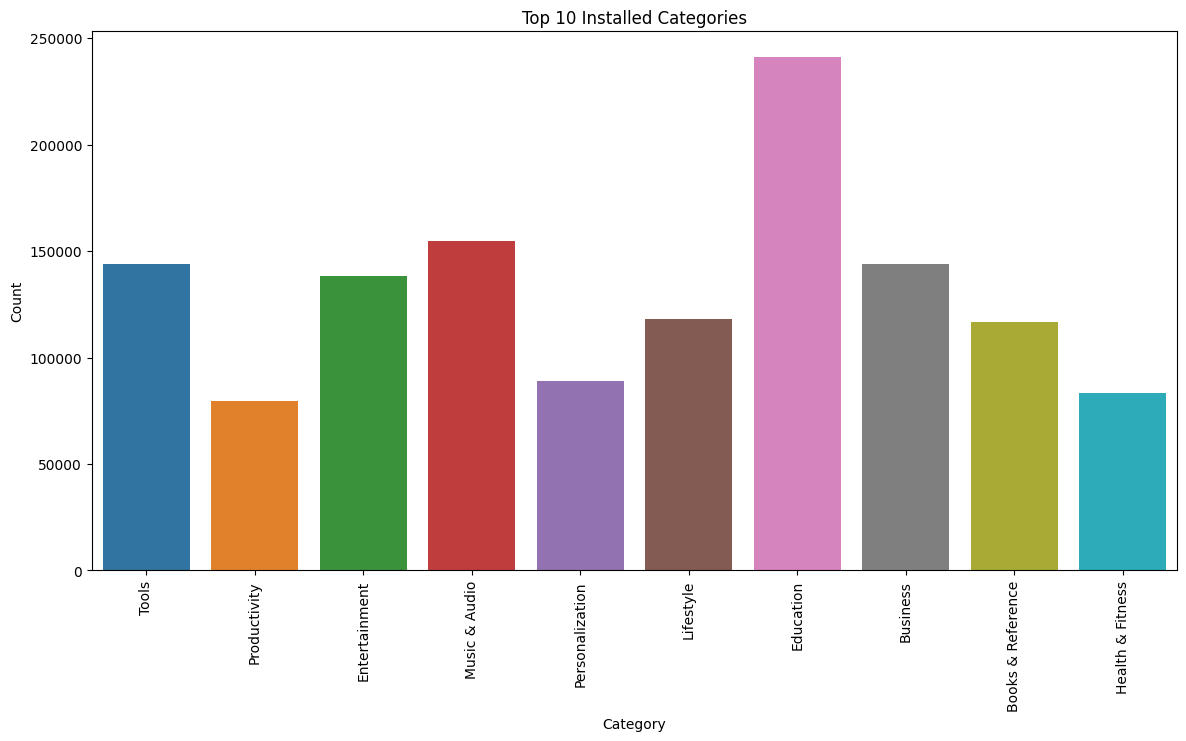

In [62]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of applications')
plt.title('Top 10 Installed Categories')
sns.barplot(x=top_10_categories_installs.Category,y=top_10_categories_installs.Count)

<Axes: title={'center': 'Top 10 Installed Categories'}, xlabel='Category', ylabel='Count'>

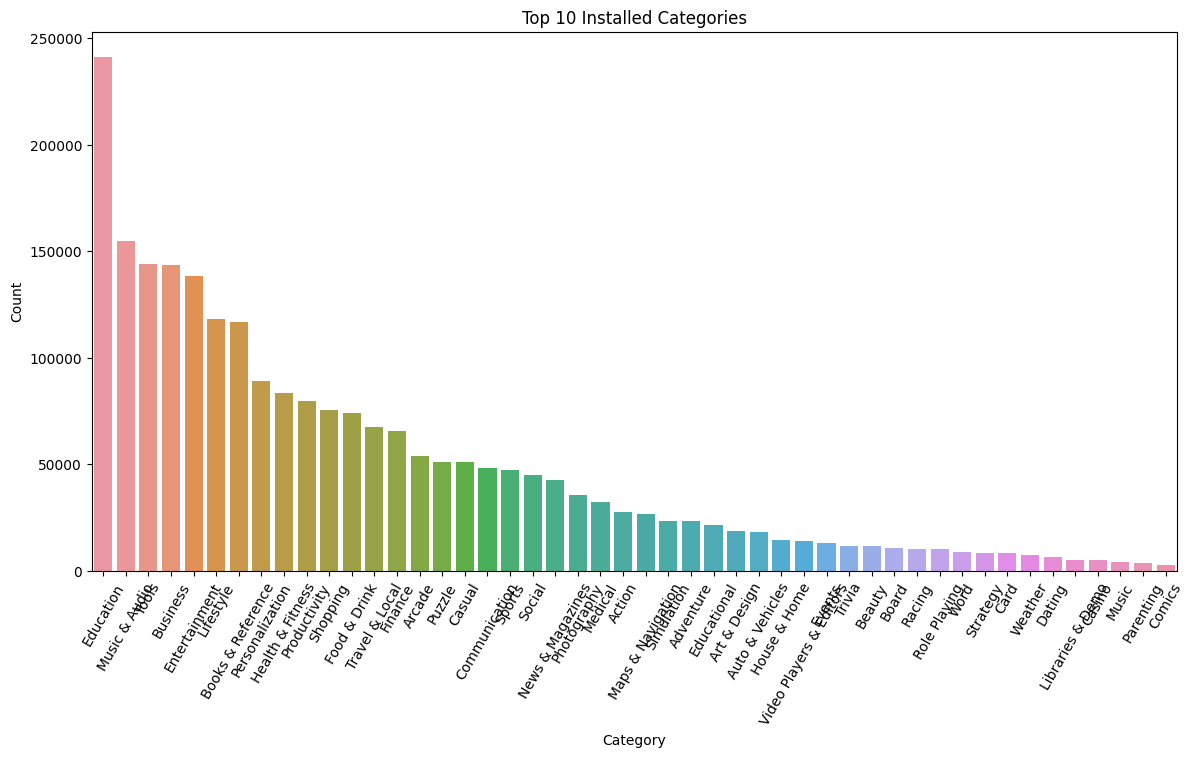

In [63]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel('Category')
plt.ylabel('Number of applications')
plt.title('Top 10 Installed Categories')
sns.barplot(x=top_category_installs.Category,y=top_category_installs.Count)

**Rating Distribution**

<ipython-input-64-456123928f28>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g=sns.kdeplot(df.Rating,color="Blue",shade=True)


Text(0.5, 1.0, 'Distribution of Rating')

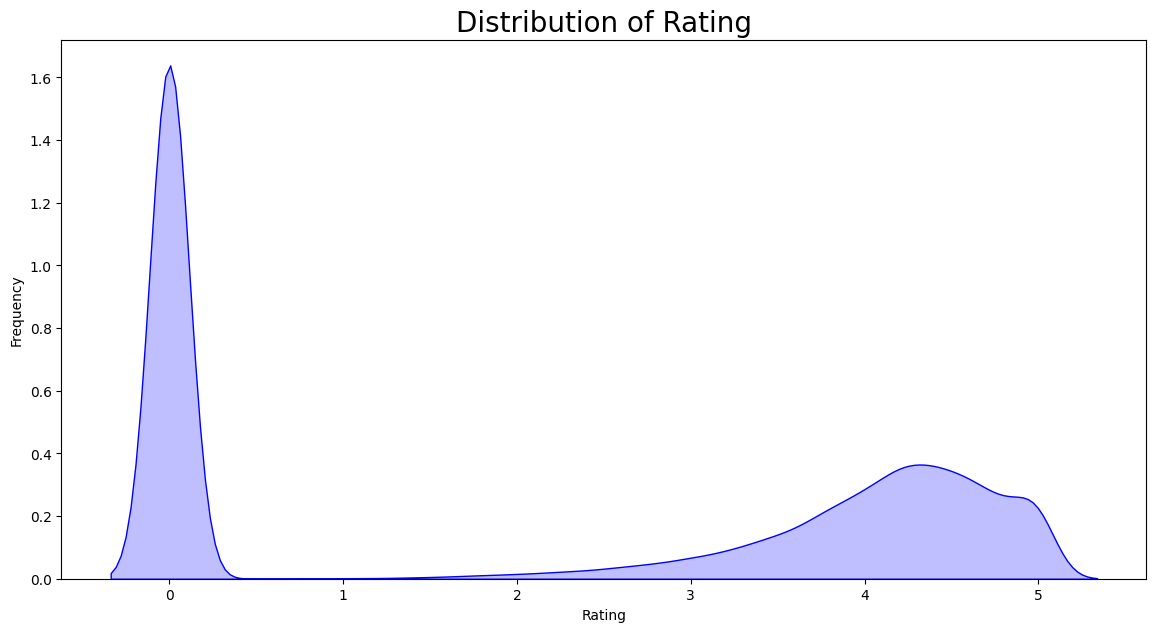

In [64]:
plt.figure(figsize=(14,7))
g=sns.kdeplot(df.Rating,color="Blue",shade=True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title("Distribution of Rating",size=20)

<Axes: title={'center': 'Rating'}, xlabel='Rating', ylabel='Count'>

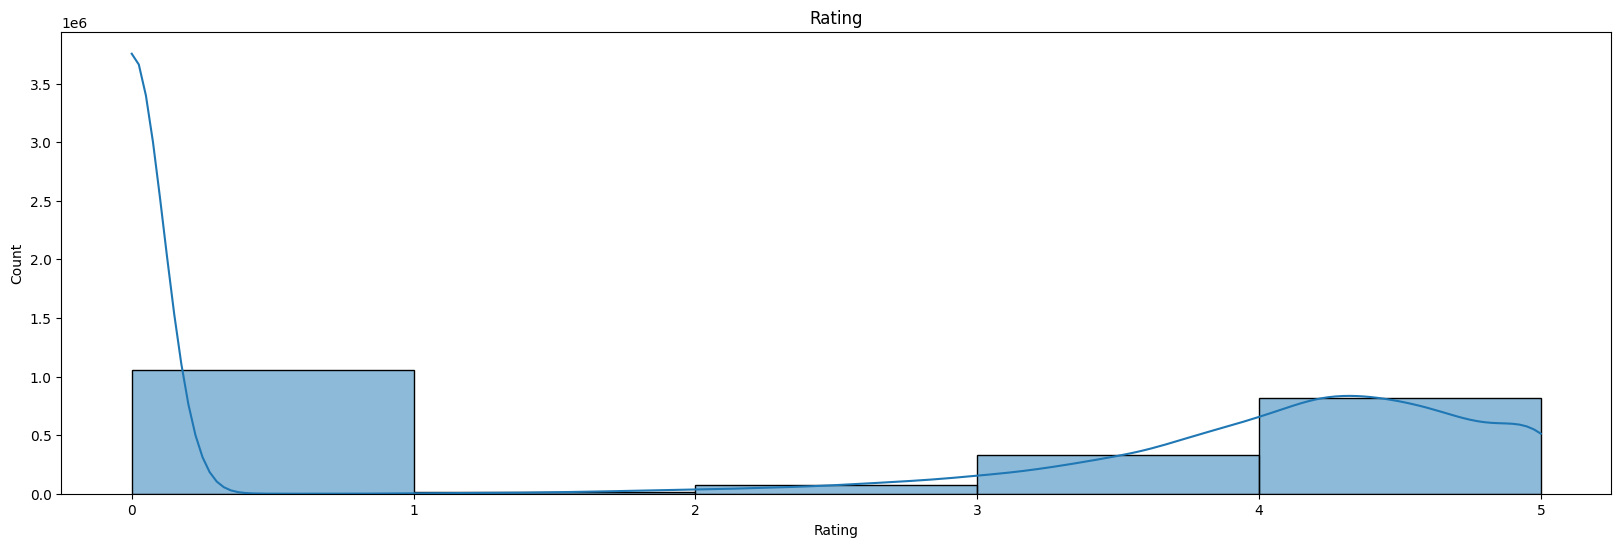

In [65]:
plt.title('Rating')
sns.histplot(df.Rating,kde=True,bins=5)

**What is the heighest rated category**

<Axes: title={'center': 'All Categories Rating'}, xlabel='Category', ylabel='Rating'>

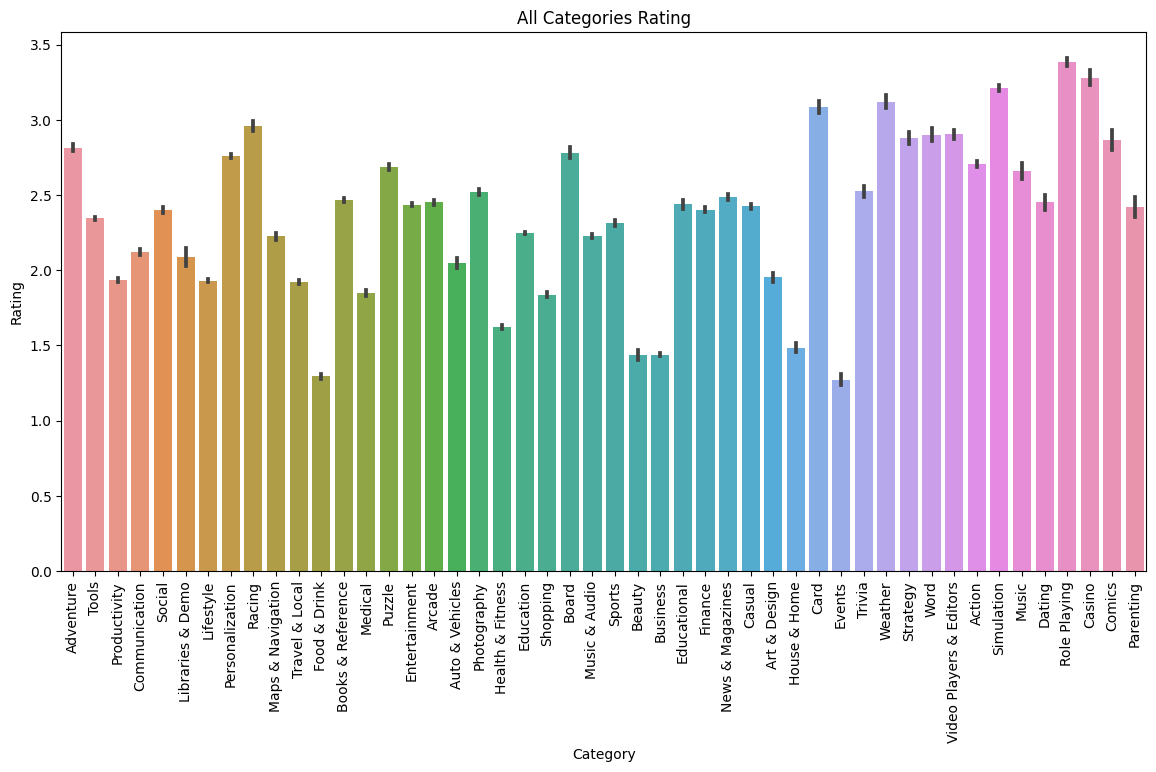

In [66]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Highest Rated Category")
plt.ylabel("Number of applications")
plt.title("All Categories Rating")
sns.barplot(x=df.Category,y=df.Rating)

Role playing is the heighest Rated category

In [67]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

<Axes: title={'center': 'Content Rating and Maximum Installations'}, xlabel='Maximum Installs', ylabel='Rating Count'>

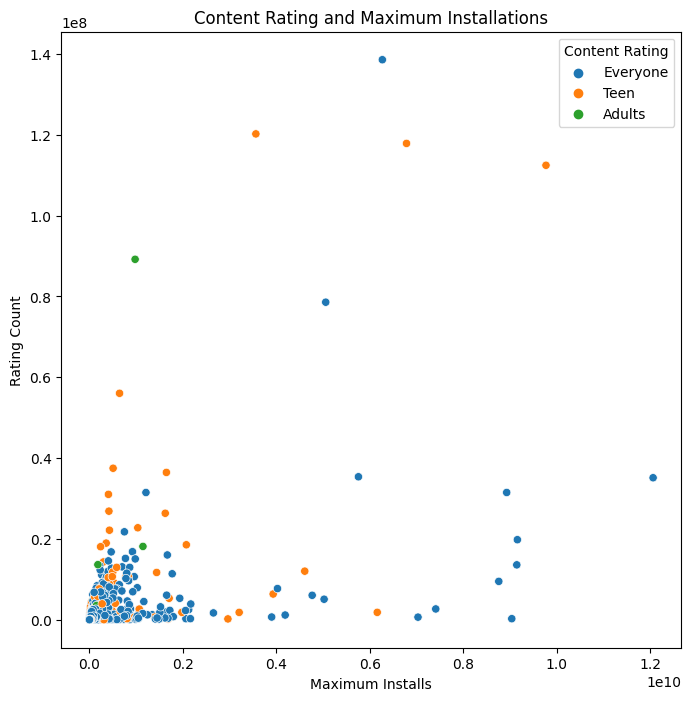

In [68]:
plt.figure(figsize=(8,8))
plt.title("Content Rating and Maximum Installations")
sns.scatterplot(x='Maximum Installs',y='Rating Count',data=df,hue='Content Rating')

**Whic category has the heighest Paid and Free apps**

In [69]:
app_count = df.groupby(['Category','Type'])[['App Name']].count().reset_index().rename(columns={'App Name':'Count'})
df_app_count = app_count.pivot('Category','Type','Count').fillna(0).reset_index()

<ipython-input-69-77e3b889c877>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_app_count = app_count.pivot('Category','Type','Count').fillna(0).reset_index()


Text(0.5, 1.0, 'Free and Paid Apps in Category')

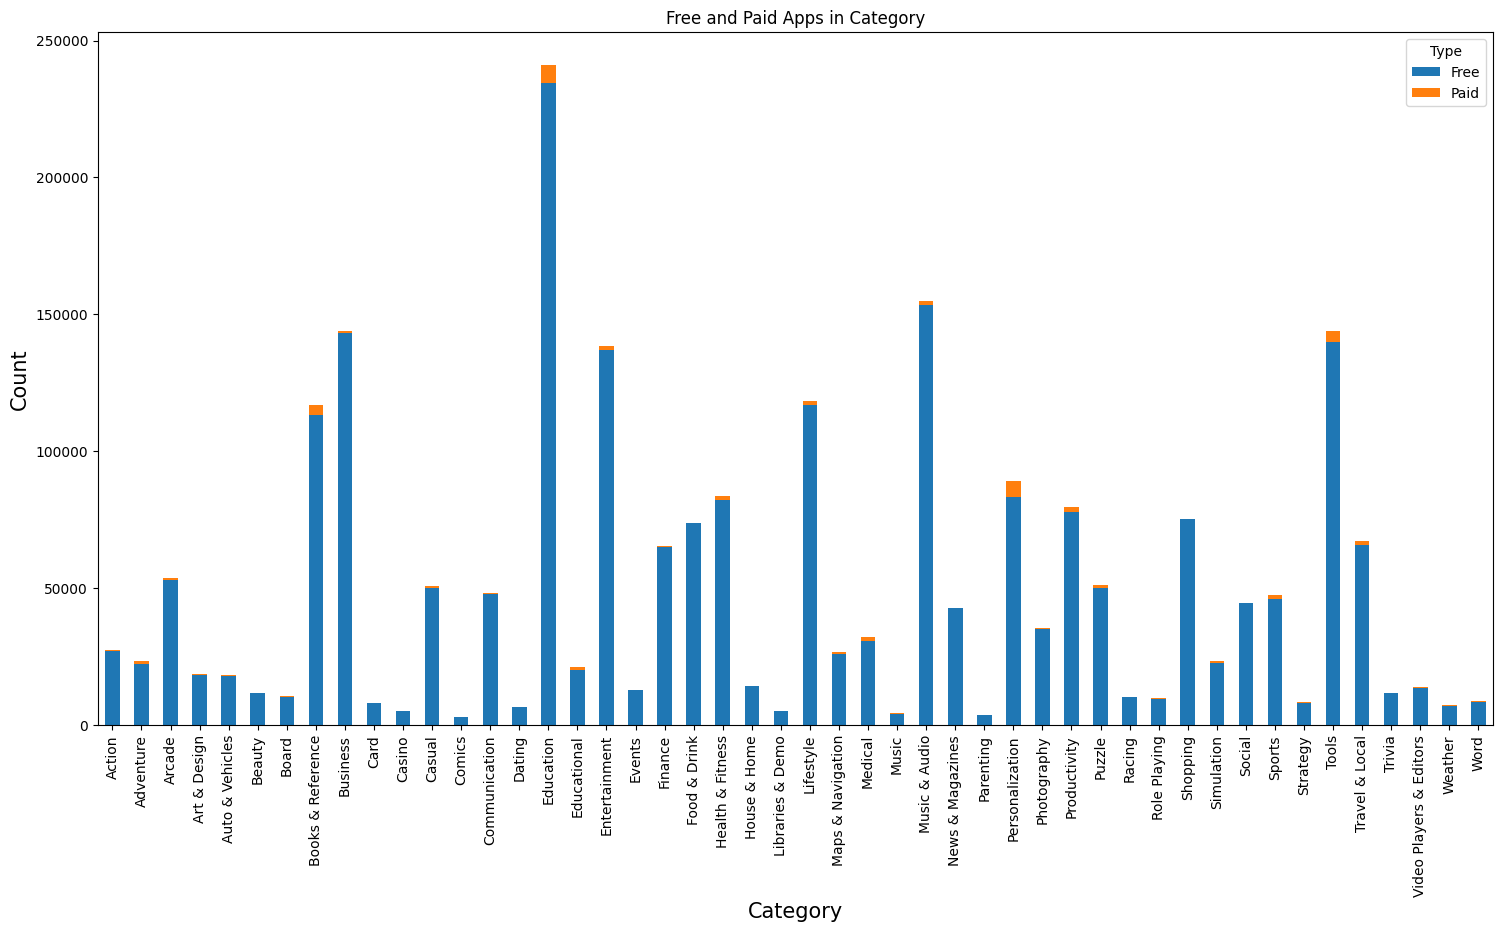

In [70]:
df_app_count.set_index('Category').plot(kind='bar',stacked=True,figsize=(18,9))
plt.xlabel('Category',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Free and Paid Apps in Category')

### **Visualize the installation type in each categories**

In [71]:
df['Installs'].min(),df['Installs'].max()

(0, 10000000000)

There is a high variance in the number of installs, we need to reduce it so we can use a log value for this column, otherwise it would be unable to see the data when we visulize

In [72]:
category_type_installs = df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
category_type_installs['log_Installs'] = np.log10(category_type_installs['Installs'])

<Axes: title={'center': 'Number of installed Apps type wise according to category'}, xlabel='Category', ylabel='log_Installs'>

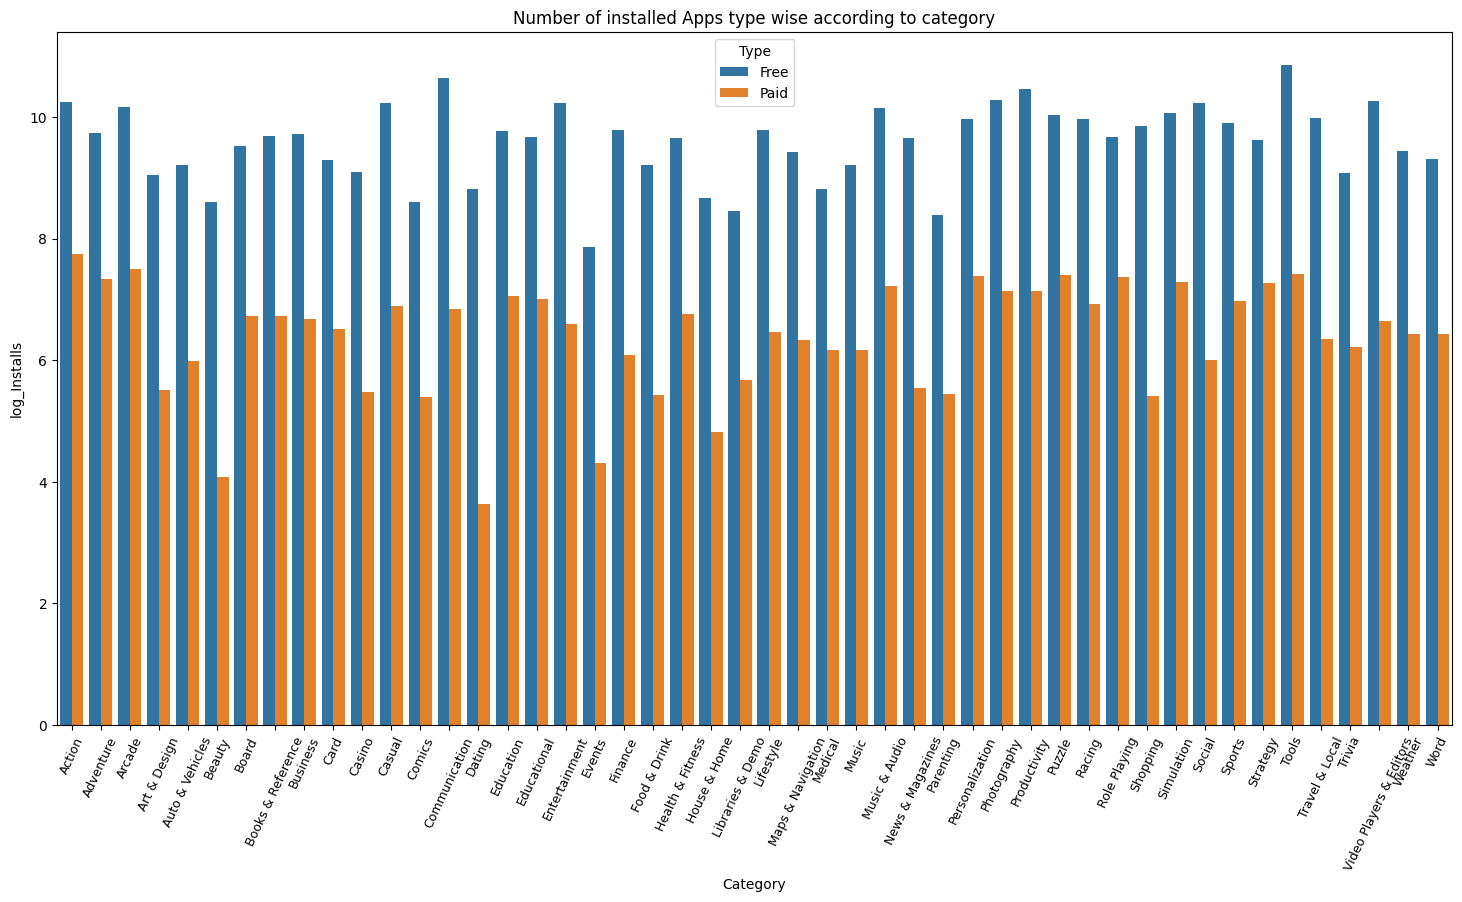

In [73]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed Apps type wise according to category")
sns.barplot(x='Category',y='log_Installs',hue='Type',data=category_type_installs)

**How does the size of application impact the installations**

In [74]:
df['log_Installs'] = np.log10(category_type_installs['Installs'])

<Axes: title={'center': 'Impact of Application Size in Installation'}, xlabel='Size', ylabel='Installs'>

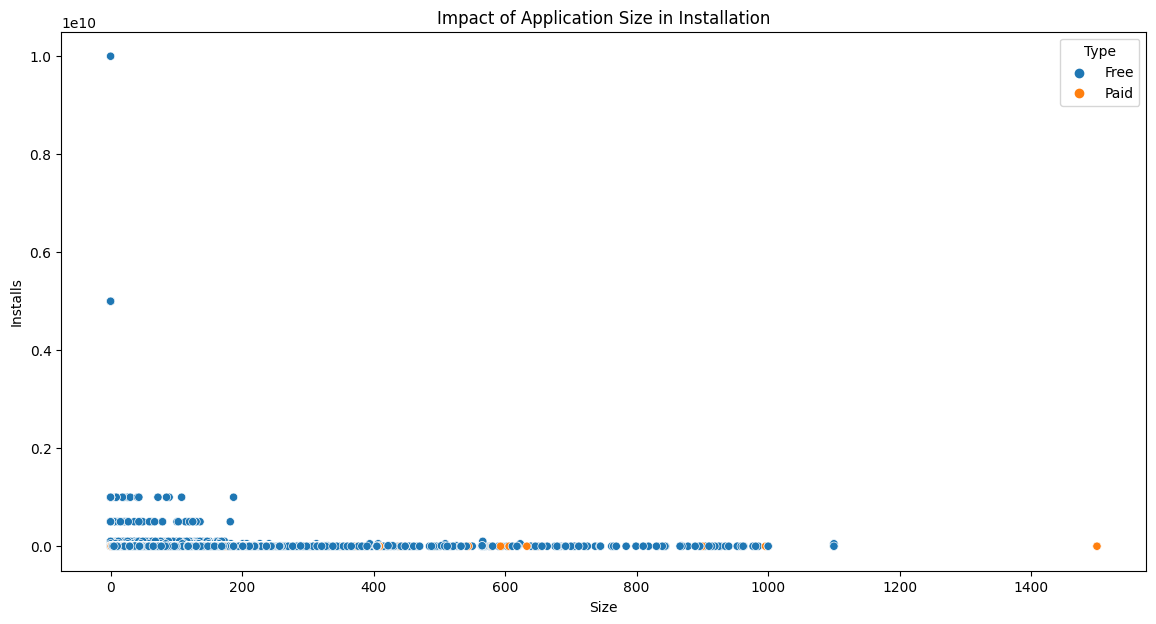

In [75]:
plt.figure(figsize=(14,7))
plt.xlabel('Size')
plt.ylabel('Installs')
plt.title('Impact of Application Size in Installation')
sns.scatterplot(x='Size',y='Installs',hue='Type',data=df)

In [76]:
df.corr()

<ipython-input-76-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size,Ad Supported,In App Purchases,Editors Choice,log_Installs
Rating,1.000000,0.013038,0.011215,0.011215,0.012615,-0.003674,0.046099,0.160503,0.153824,0.019485,-0.023632
Rating Count,0.013038,1.000000,0.545281,0.545281,0.547571,-0.000411,0.013600,0.005294,0.025737,0.137311,0.076834
Installs,0.011215,0.545281,1.000000,1.000000,0.954037,-0.000461,0.004240,0.002249,0.014178,0.059932,0.077248
Minimum Installs,0.011215,0.545281,1.000000,1.000000,0.954037,-0.000461,0.004240,0.002249,0.014178,0.059932,0.077248
Maximum Installs,0.012615,0.547571,0.954037,0.954037,1.000000,-0.000515,0.005093,0.002881,0.016100,0.064206,0.079792
Price,-0.003674,-0.000411,-0.000461,-0.000461,-0.000515,1.000000,0.004160,-0.034281,-0.002636,0.000503,NaN
Size,0.046099,0.013600,0.004240,0.004240,0.005093,0.004160,1.000000,-0.042772,0.165194,0.039926,0.024328
Ad Supported,0.160503,0.005294,0.002249,0.002249,0.002881,-0.034281,-0.042772,1.000000,0.138304,0.005701,0.140935
In App Purchases,0.153824,0.025737,0.014178,0.014178,0.016100,-0.002636,0.165194,0.138304,1.000000,0.046078,-0.021114
Editors Choice,0.019485,0.137311,0.059932,0.059932,0.064206,0.000503,0.039926,0.005701,0.046078,1.000000,NaN


<ipython-input-77-8632fe90f3f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,cmap='coolwarm')


<Axes: >

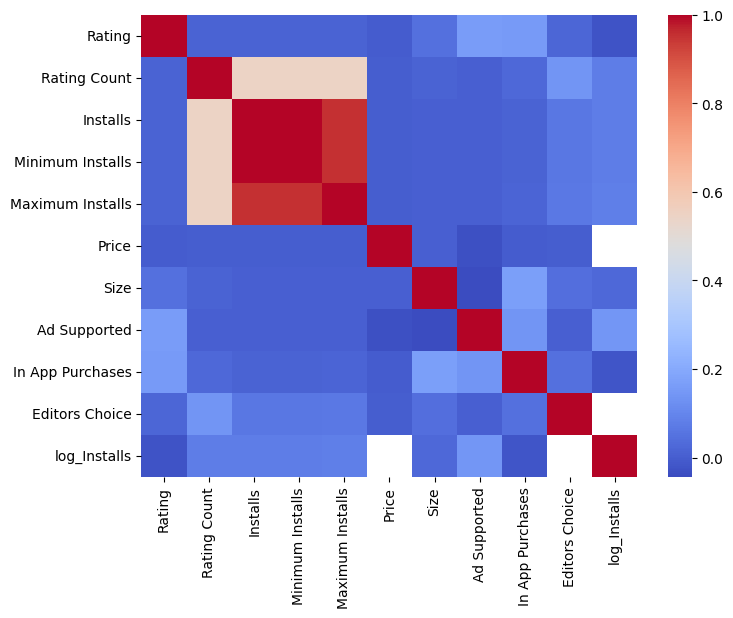

In [77]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cbar=True,cmap='coolwarm')

**What are the top 5 paid Apps based with highest ratings and installs?**

In [78]:
df['Installs'].max()

10000000000

In [79]:
paid_apps = df[(df.Type=='Paid')&(df.Installs>=5000000)]
paid_apps = paid_apps.groupby('App Name')['Rating'].max().sort_values(ascending=False)

<Axes: title={'center': 'Top 5 Paid Rated Apps'}, xlabel='Rating', ylabel='App Name'>

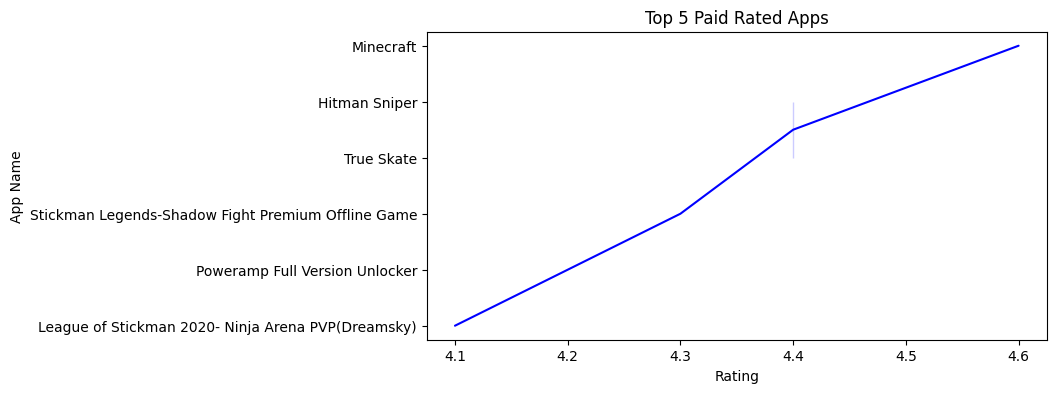

In [80]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Paid Rated Apps")
sns.lineplot(x=paid_apps.values,y=paid_apps.index,color='Blue')

**What are the top 5 paid Apps based with highest ratings and installs?**

In [85]:
free_apps = df[(df.Type=='Free')&(df.Installs>=5000000)]
free_apps = free_apps.groupby('App Name')['Rating'].max().sort_values(ascending=False)
free_apps = free_apps.head(5)

<Axes: title={'center': 'Top 5 Free Rated Apps'}, xlabel='Rating', ylabel='App Name'>

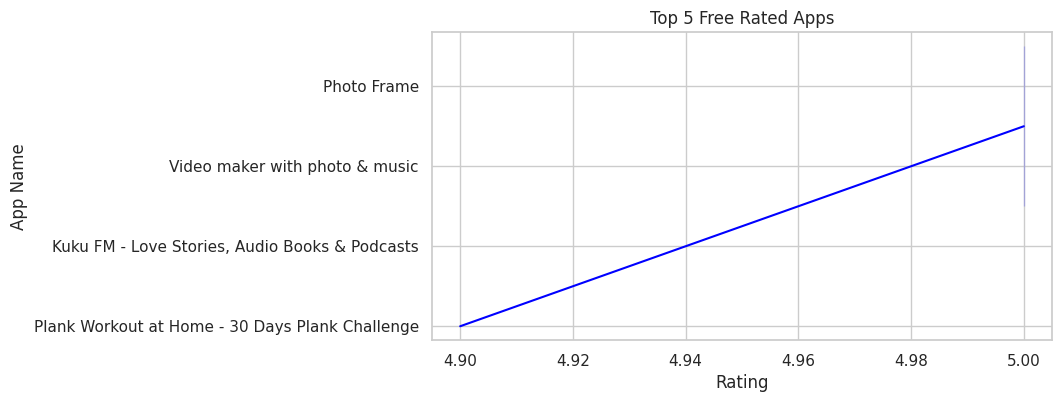

In [86]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Free Rated Apps")
sns.lineplot(x=free_apps.values,y=free_apps.index,color='Blue')

**Visualize the caategories that have the Top 10 max installations**

Text(0.5, 1.0, 'Top 10 Max installations Category Wise')

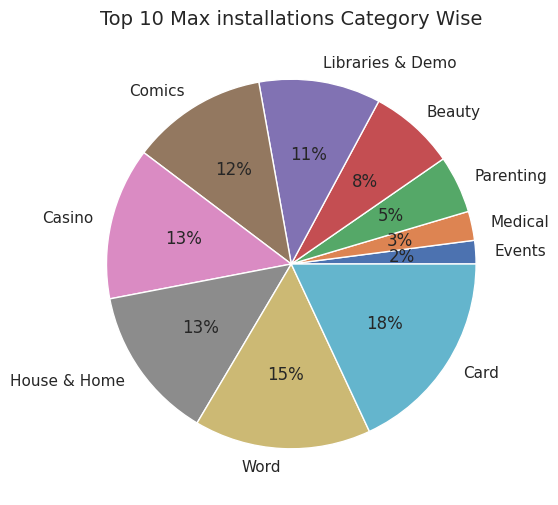

In [88]:
plt.figure(figsize=(8,6))
data = df.groupby('Category')['Maximum Installs'].max().sort_values(ascending = True)
data = data.head(10)
labels = data.keys()
plt.pie(data,labels=labels,autopct='%.0f%%')
plt.title("Top 10 Max installations Category Wise",fontsize=14)

## **Summary and Conclusion:**
1.People are more interested to install the gaming Apps,the top Rating is given to the gaming apps.

2.In App purchases are correlated to App rating.So we can say that if the app provides customer support and have subscription plans it will helps to engage customers.

3.Most people does not gave rating,But the people who are given rating are trend to give 4+ rating the most.

4.Most of the Adults installed the social and communication Apps.

5.Most of the installations are done by the teens and the most are Video Players and Editions. Video Players and Editore has more demand.

6.Size of the installation varies installations